<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variational-Autoencoder-Using-Keras" data-toc-modified-id="Variational-Autoencoder-Using-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variational Autoencoder Using Keras</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Loading Data</a></span></li></ul></li></ul></li></ul></div>

# Variational Autoencoder Using Keras

The code is based on the book [Generative Deep Learning by David Foster](https://www.oreilly.com/library/view/generative-deep-learning/9781492041931/).

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from Models.VAE_Keras import VariationalAutoencoder_Keras

Using TensorFlow backend.


In [3]:
import os 

# run params
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build'

In [4]:
vae = VariationalAutoencoder_Keras(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64]#, 64]
    , encoder_conv_kernel_size = [3,3,3]#,3]
    , encoder_conv_strides = [1,2,2]#,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

if mode == 'build':
    vae.save(RUN_FOLDER)
else:
    vae.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0123 18:09:53.044804 140690260408128 deprecation_wrapper.py:119] From /home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0123 18:09:53.077806 140690260408128 deprecation_wrapper.py:119] From /home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0123 18:09:53.202549 140690260408128 deprecation_wrapper.py:119] From /home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0123 18:09:53.311115 140690260408128 deprecation_wrapper.py:119] From /home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_norma

### Loading Data

In [5]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape + (1,))

In [6]:
vae.encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 28, 28, 32)   0           encoder_conv_0[0][0]             
__________________________________________________________________________________________________
encoder_conv_1 (Conv2D)         (None, 14, 14, 64)   18496       leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
leaky_re_l

In [7]:
vae.decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_0 (Conv2DTran (None, 7, 7, 64)          36928     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
decoder_conv_t_1 (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
__________

In [8]:
#Compile Parameters

LEARNING_RATE = 0.0005
R_LOSS_FACTOR = 1000
BETA = 2000

In [9]:
vae.compile(LEARNING_RATE, R_LOSS_FACTOR, BETA)

W0123 18:10:02.035015 140690260408128 deprecation_wrapper.py:119] From /home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [10]:
# Training Parameters

BATCH_SIZE = 256
EPOCHS = 2
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

In [11]:
vae.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , initial_epoch = INITIAL_EPOCH
)

W0123 18:10:06.585934 140690260408128 deprecation_wrapper.py:119] From /home/nahum/anaconda3/envs/generative/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/2
60000/60000 [==============================] - 176s 3ms/step - loss: 86.5585 - vae_r_loss: 86.4381 - vae_kl_loss: 6.0168e-05

Epoch 00001: saving model to run/vae/0001_digits/weights/weights-001-86.56.h5

Epoch 00001: saving model to run/vae/0001_digits/weights/weights.h5
Epoch 2/2
60000/60000 [==============================] - 167s 3ms/step - loss: 67.6830 - vae_r_loss: 67.6769 - vae_kl_loss: 3.0598e-06

Epoch 00002: saving model to run/vae/0001_digits/weights/weights-002-67.68.h5

Epoch 00002: saving model to run/vae/0001_digits/weights/weights.h5


In [15]:
vae.plot_model(RUN_FOLDER)

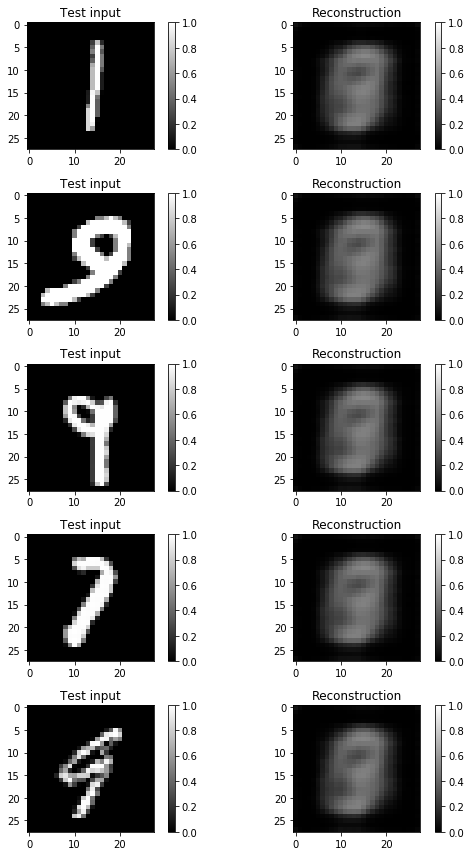

In [14]:
n_to_show = 5
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

plt.figure(figsize=(8, 12))
for i in range(n_to_show):

    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(example_images[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Test input")
    plt.colorbar()
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(reconst_images[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
    plt.title("Reconstruction")
    plt.colorbar()
    
plt.tight_layout()

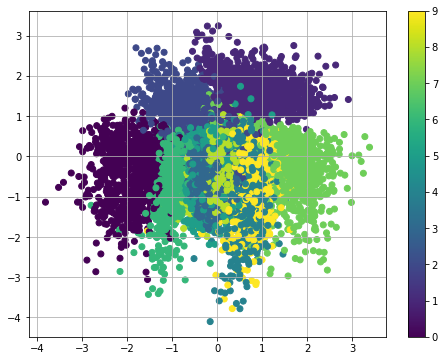

In [30]:
z_mu = vae.encoder.predict(x_test)
plt.figure(figsize=(8, 6)) 
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=y_test)
plt.colorbar()
plt.grid()

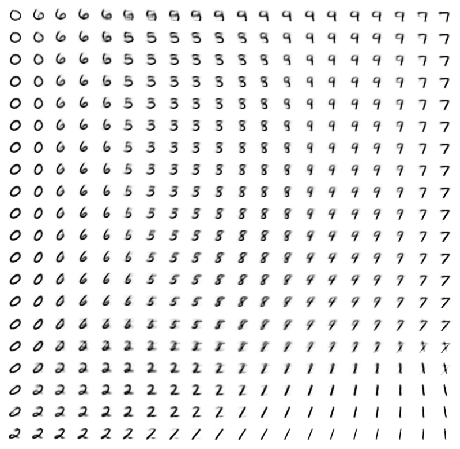

In [49]:
from scipy.stats import norm

x = norm.ppf(np.linspace(0.01, 0.99, grid_size))
y = norm.ppf(np.linspace(0.01, 0.99, grid_size))

xv, yv = np.meshgrid(x, y)

xv = xv.flatten()
yv = yv.flatten()

z_grid = np.array(list(zip(xv, yv)))

reconst = vae.decoder.predict(z_grid)


fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')